# Aug 20th, 2022 (Degree: re-calculate save group)

**Motivation**:  <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
load_dir = pjoin(tmp_dir, 'Adjacencies')
print(load_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/Adjacencies

## 512

In [3]:
nn = 512
num_k = 7
perc = 15
mice = Mice(nn)

bt_dict, props_bo, props_ca = default_props(mice, num_k, perc)
bt = BootStrap(**props_ca)
pal = prepare_palette()

n_nodes = len(mice.node_lookup['ca2'])
n_nodes

542

### FIX BOLD

In [4]:
desc = 'bp(0.01,0.5)'
a_all = np.load(pjoin(load_dir, f"fine-bo_{desc}.npy"))
a_all.shape

(114, 542, 542)

In [5]:
deg = np_nans(a_all.shape[:2])
a_bin = np_nans(a_all.shape)
for i, a in enumerate(a_all):
    th = calculate_threshold(a, perc / 100)
    th = th.pop()
    # Binarize
    _a = a.copy()
    _a[a <= th] = 0
    _a[a > th] = 1
    a_bin[i] = _a
    # Degree
    nan = np.isnan(a).sum(0) == len(a)
    zero = np.nanmean(np.abs(a), 0) == 0
    good = np.logical_and(~nan, ~zero)
    a_eff = _a[good][:, good]
    deg[i] = _a.sum(0)
deg_avg = bn.nanmean(deg, 0)
deg.shape, deg_avg.shape

((114, 542), (542,))

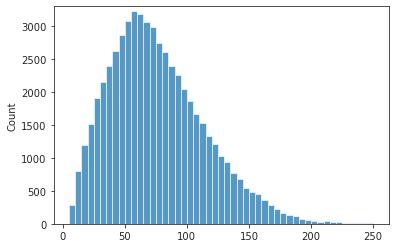

In [6]:
sns.histplot(deg.ravel(), bins=np.linspace(5, 250, 50))
plt.ylim(0, 3300);

In [7]:
self = Group(**props_bo)
print(self.path)
os.listdir(self.path)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/results/SVINET/Gro
up/real_pearson_bold-lite_rest_bp(0.01,0.5)_k7_p15-sample

[
    'run_deg.npy',
    'run_pi.npy',
    'se-BCa_indiv-pi_1.0e+04.npy',
    'pi_prune.npy',
    'address.npy',
    'n_runs.npy',
    'n_seeds.npy',
    'se-BCa_group-pi_1.0e+05.npy',
    'perms_prune.npy',
    'run_seed_rank.npy',
    'run_lam.npy',
    'fit_meta.npy'
]

In [8]:
assert len(self.address) == len(a_all)

In [9]:
deg_runs = np_nans((
    self.mice.cfg.n_subjects,
    self.mice.cfg.n_sessions,
    max(self.n_runs.values()),
    len(self.n2l),
))
for ii, (i, j, k) in enumerate(self.address.values()):
    deg_runs[i, j, k] = deg[ii]

_ = save_obj(
    obj=deg_runs,
    file_name='run_deg',
    save_dir=self.path,
    verbose=True,
    mode='npy',
)
deg_runs.shape

[PROGRESS] 'run_deg.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/results/SVINET/Gro
up/real_pearson_bold-lite_rest_bp(0.01,0.5)_k7_p15-sample

(10, 3, 4, 542)

In [10]:
for kk in range(3, 25):
    props_bo['num_k'] = kk
    self = Group(**props_bo)
    if not self.fit_meta:
        continue
    _ = save_obj(
        obj=deg_runs,
        file_name='run_deg',
        save_dir=self.path,
        verbose=False,
        mode='npy',
    )

### FIX CAS

In [11]:
desc = 'bp(0.01,0.5)'
mice.band['ca2'] = (0.01, 0.5)
a_all = np.load(pjoin(load_dir, f"fine-ca_{desc}.npy"))
a_all.shape

(112, 542, 542)

In [12]:
deg = np_nans(a_all.shape[:2])
a_bin = np_nans(a_all.shape)
for i, a in enumerate(a_all):
    th = calculate_threshold(a, perc / 100)
    th = th.pop()
    # Binarize
    _a = a.copy()
    _a[a <= th] = 0
    _a[a > th] = 1
    a_bin[i] = _a
    # Degree
    nan = np.isnan(a).sum(0) == len(a)
    zero = np.nanmean(np.abs(a), 0) == 0
    good = np.logical_and(~nan, ~zero)
    a_eff = _a[good][:, good]
    deg[i] = _a.sum(0)
deg_avg = bn.nanmean(deg, 0)
deg.shape, deg_avg.shape

((112, 542), (542,))

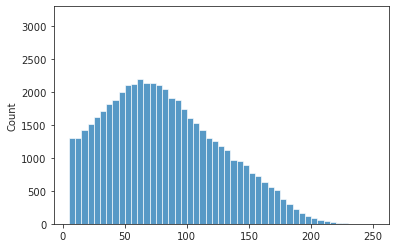

In [13]:
sns.histplot(deg.ravel(), bins=np.linspace(5, 250, 50))
plt.ylim(0, 3300);

In [15]:
self = Group(**props_ca)
print(self.path)
os.listdir(self.path)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/results/SVINET/Gro
up/real_pearson_ca2_rest_bp(0.01,0.5)_k7_p15-sample

[
    'run_deg.npy',
    'run_pi.npy',
    'se-BCa_indiv-pi_1.0e+04.npy',
    'pi_prune.npy',
    'address.npy',
    'n_runs.npy',
    'n_seeds.npy',
    'se-BCa_group-pi_1.0e+05.npy',
    'perms_prune.npy',
    'run_seed_rank.npy',
    'run_lam.npy',
    'fit_meta.npy'
]

In [16]:
len(self.address) == len(a_all)

False

In [17]:
len(self.address), len(a_all), len(mice.ca)

(110, 112, 112)

In [18]:
[k for k in mice.ca if k not in self.address]

['sub-SLC02_ses-1_run-3', 'sub-SLC07_ses-2_run-7']

In [19]:
address_aug = self.address.copy()
address_aug['sub-SLC02_ses-1_run-3'] = None
address_aug['sub-SLC07_ses-2_run-7'] = None
address_aug = dict(sorted(address_aug.items()))

In [20]:
deg_runs = np_nans((
    self.mice.cfg.n_subjects,
    self.mice.cfg.n_sessions,
    max(self.n_runs.values()),
    len(self.n2l),
))
for ii, ijk in enumerate(address_aug.values()):
    if ijk is None:
        continue
    i, j, k = ijk
    deg_runs[i, j, k] = deg[ii]

_ = save_obj(
    obj=deg_runs,
    file_name='run_deg',
    save_dir=self.path,
    verbose=True,
    mode='npy',
)
deg_runs.shape

[PROGRESS] 'run_deg.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/results/SVINET/Gro
up/real_pearson_ca2_rest_bp(0.01,0.5)_k7_p15-sample

(10, 3, 4, 542)

In [21]:
for kk in range(3, 25):
    props_ca['num_k'] = kk
    self = Group(**props_ca)
    if not self.fit_meta:
        continue
    _ = save_obj(
        obj=deg_runs,
        file_name='run_deg',
        save_dir=self.path,
        verbose=False,
        mode='npy',
    )

### FIX CAF

In [22]:
desc = 'bp(0.5,5.0)'
mice.band['ca2'] = (0.5, 5.0)
a_all = np.load(pjoin(load_dir, f"fine-ca_{desc}.npy"))
a_all.shape

(112, 542, 542)

In [23]:
deg = np_nans(a_all.shape[:2])
a_bin = np_nans(a_all.shape)
for i, a in enumerate(a_all):
    th = calculate_threshold(a, perc / 100)
    th = th.pop()
    # Binarize
    _a = a.copy()
    _a[a <= th] = 0
    _a[a > th] = 1
    a_bin[i] = _a
    # Degree
    nan = np.isnan(a).sum(0) == len(a)
    zero = np.nanmean(np.abs(a), 0) == 0
    good = np.logical_and(~nan, ~zero)
    a_eff = _a[good][:, good]
    deg[i] = _a.sum(0)
deg_avg = bn.nanmean(deg, 0)
deg.shape, deg_avg.shape

((112, 542), (542,))

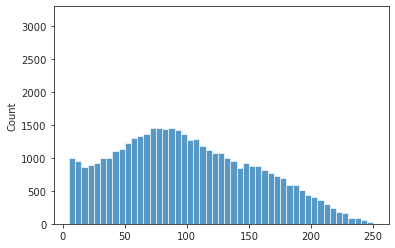

In [24]:
sns.histplot(deg.ravel(), bins=np.linspace(5, 250, 50))
plt.ylim(0, 3300);

In [25]:
props_ca['num_k'] = 7
self = Group(**props_ca)
print(self.path)
os.listdir(self.path)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/results/SVINET/Gro
up/real_pearson_ca2_rest_bp(0.5,5.0)_k7_p15-sample

[
    'run_deg.npy',
    'run_pi.npy',
    'se-BCa_indiv-pi_1.0e+04.npy',
    'pi_prune.npy',
    'address.npy',
    'n_runs.npy',
    'n_seeds.npy',
    'se-BCa_group-pi_1.0e+05.npy',
    'perms_prune.npy',
    'run_seed_rank.npy',
    'run_lam.npy',
    'fit_meta.npy'
]

In [26]:
len(self.address) == len(a_all)

False

In [27]:
len(self.address), len(a_all), len(mice.ca)

(110, 112, 112)

In [28]:
[k for k in mice.ca if k not in self.address]

['sub-SLC02_ses-1_run-3', 'sub-SLC07_ses-2_run-7']

In [29]:
address_aug = self.address.copy()
address_aug['sub-SLC02_ses-1_run-3'] = None
address_aug['sub-SLC07_ses-2_run-7'] = None
address_aug = dict(sorted(address_aug.items()))

In [30]:
deg_runs = np_nans((
    self.mice.cfg.n_subjects,
    self.mice.cfg.n_sessions,
    max(self.n_runs.values()),
    len(self.n2l),
))
for ii, ijk in enumerate(address_aug.values()):
    if ijk is None:
        continue
    i, j, k = ijk
    deg_runs[i, j, k] = deg[ii]

_ = save_obj(
    obj=deg_runs,
    file_name='run_deg',
    save_dir=self.path,
    verbose=True,
    mode='npy',
)
deg_runs.shape

[PROGRESS] 'run_deg.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-512*3/results/SVINET/Gro
up/real_pearson_ca2_rest_bp(0.5,5.0)_k7_p15-sample

(10, 3, 4, 542)

In [31]:
for kk in range(3, 25):
    props_ca['num_k'] = kk
    self = Group(**props_ca)
    if not self.fit_meta:
        continue
    _ = save_obj(
        obj=deg_runs,
        file_name='run_deg',
        save_dir=self.path,
        verbose=False,
        mode='npy',
    )

## Test if it's correct

In [32]:
nn = 512
num_k = 7
perc = 15
mice = Mice(nn)
bt_dict, props_bo, props_ca = default_props(mice, num_k, perc)
bt = BootStrap(**props_ca)
pal = prepare_palette()

n_nodes = len(mice.node_lookup['ca2'])
n_nodes

542

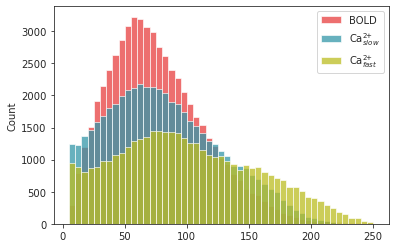

In [36]:
for mode, o in bt_dict.items():
    sns.histplot(
        data=o.run_deg[o.run_deg.nonzero()],
        bins=np.linspace(5, 250, 50),
        color=pal[mode],
        label=mode,
    )
plt.legend()
plt.show()

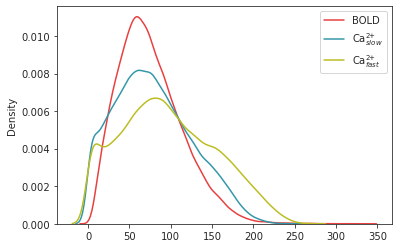

In [37]:
for mode, o in bt_dict.items():
    sns.kdeplot(
        o.run_deg[o.run_deg.nonzero()],
        color=pal[mode],
        label=mode,
    )
plt.legend()
plt.show()